In [1]:
from collections import Counter
import json
import os
import string
import random

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader

In [2]:
namedf = pd.read_csv("surnames_with_splits.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'surnames_with_splits.csv'

In [ ]:
characters = set("".join(list(namedf['surname'])))
print(characters)

{'ł', 'Ż', 'p', 'd', 'a', 'K', 'B', 'ì', 'm', 'ù', 'H', 'M', 'í', 'D', 'W', 'ó', "'", 'k', 'v', 'e', 'R', 'n', 'è', 'r', 'à', 'N', 'c', 'ã', 'Y', 'ä', 'ß', 'F', 'C', 'l', 'h', ':', 'ò', 'é', 'ü', 'õ', 'Ś', 'J', 'á', 'b', 'ú', 'G', 'x', 'ą', 'U', '1', '/', 'L', 'q', 'V', 'A', '-', 'Q', 'ê', 'I', 'P', 't', 'O', 'z', 'E', 'Á', 'g', 'X', 'ż', 'j', 'Z', 'w', 'ç', 'ñ', 'o', 'u', 's', 'T', 'É', 'f', 'y', 'ö', 'i', 'ń', 'S'}


In [ ]:
vocab = {c:i for i,c in enumerate(characters)}
vocab["START"] = max(vocab.values())+1
vocab["END"] = max(vocab.values())+1
print(vocab)

{'ł': 0, 'Ż': 1, 'p': 2, 'd': 3, 'a': 4, 'K': 5, 'B': 6, 'ì': 7, 'm': 8, 'ù': 9, 'H': 10, 'M': 11, 'í': 12, 'D': 13, 'W': 14, 'ó': 15, "'": 16, 'k': 17, 'v': 18, 'e': 19, 'R': 20, 'n': 21, 'è': 22, 'r': 23, 'à': 24, 'N': 25, 'c': 26, 'ã': 27, 'Y': 28, 'ä': 29, 'ß': 30, 'F': 31, 'C': 32, 'l': 33, 'h': 34, ':': 35, 'ò': 36, 'é': 37, 'ü': 38, 'õ': 39, 'Ś': 40, 'J': 41, 'á': 42, 'b': 43, 'ú': 44, 'G': 45, 'x': 46, 'ą': 47, 'U': 48, '1': 49, '/': 50, 'L': 51, 'q': 52, 'V': 53, 'A': 54, '-': 55, 'Q': 56, 'ê': 57, 'I': 58, 'P': 59, 't': 60, 'O': 61, 'z': 62, 'E': 63, 'Á': 64, 'g': 65, 'X': 66, 'ż': 67, 'j': 68, 'Z': 69, 'w': 70, 'ç': 71, 'ñ': 72, 'o': 73, 'u': 74, 's': 75, 'T': 76, 'É': 77, 'f': 78, 'y': 79, 'ö': 80, 'i': 81, 'ń': 82, 'S': 83, 'START': 84, 'END': 85}


In [ ]:
print(vocab)

{'ł': 0, 'Ż': 1, 'p': 2, 'd': 3, 'a': 4, 'K': 5, 'B': 6, 'ì': 7, 'm': 8, 'ù': 9, 'H': 10, 'M': 11, 'í': 12, 'D': 13, 'W': 14, 'ó': 15, "'": 16, 'k': 17, 'v': 18, 'e': 19, 'R': 20, 'n': 21, 'è': 22, 'r': 23, 'à': 24, 'N': 25, 'c': 26, 'ã': 27, 'Y': 28, 'ä': 29, 'ß': 30, 'F': 31, 'C': 32, 'l': 33, 'h': 34, ':': 35, 'ò': 36, 'é': 37, 'ü': 38, 'õ': 39, 'Ś': 40, 'J': 41, 'á': 42, 'b': 43, 'ú': 44, 'G': 45, 'x': 46, 'ą': 47, 'U': 48, '1': 49, '/': 50, 'L': 51, 'q': 52, 'V': 53, 'A': 54, '-': 55, 'Q': 56, 'ê': 57, 'I': 58, 'P': 59, 't': 60, 'O': 61, 'z': 62, 'E': 63, 'Á': 64, 'g': 65, 'X': 66, 'ż': 67, 'j': 68, 'Z': 69, 'w': 70, 'ç': 71, 'ñ': 72, 'o': 73, 'u': 74, 's': 75, 'T': 76, 'É': 77, 'f': 78, 'y': 79, 'ö': 80, 'i': 81, 'ń': 82, 'S': 83, 'START': 84, 'END': 85}


In [ ]:
idx_to_token = {v: k for k, v in vocab.items()}
print(idx_to_token)

{0: 'ł', 1: 'Ż', 2: 'p', 3: 'd', 4: 'a', 5: 'K', 6: 'B', 7: 'ì', 8: 'm', 9: 'ù', 10: 'H', 11: 'M', 12: 'í', 13: 'D', 14: 'W', 15: 'ó', 16: "'", 17: 'k', 18: 'v', 19: 'e', 20: 'R', 21: 'n', 22: 'è', 23: 'r', 24: 'à', 25: 'N', 26: 'c', 27: 'ã', 28: 'Y', 29: 'ä', 30: 'ß', 31: 'F', 32: 'C', 33: 'l', 34: 'h', 35: ':', 36: 'ò', 37: 'é', 38: 'ü', 39: 'õ', 40: 'Ś', 41: 'J', 42: 'á', 43: 'b', 44: 'ú', 45: 'G', 46: 'x', 47: 'ą', 48: 'U', 49: '1', 50: '/', 51: 'L', 52: 'q', 53: 'V', 54: 'A', 55: '-', 56: 'Q', 57: 'ê', 58: 'I', 59: 'P', 60: 't', 61: 'O', 62: 'z', 63: 'E', 64: 'Á', 65: 'g', 66: 'X', 67: 'ż', 68: 'j', 69: 'Z', 70: 'w', 71: 'ç', 72: 'ñ', 73: 'o', 74: 'u', 75: 's', 76: 'T', 77: 'É', 78: 'f', 79: 'y', 80: 'ö', 81: 'i', 82: 'ń', 83: 'S', 84: 'START', 85: 'END'}


In [ ]:
for name in namedf.surname:
    trigrams = []
    nextchars = []
    padname = ["START","START","START"] + list(name) + ["END"]
    for ix in range(0,len(padname)-3):
        trigrams.append(padname[ix:ix+3])
        nextchars.append(padname[ix+3])
    print(name,trigrams,nextchars,sep=" \n")

Totah 
[['START', 'START', 'START'], ['START', 'START', 'T'], ['START', 'T', 'o'], ['T', 'o', 't'], ['o', 't', 'a'], ['t', 'a', 'h']] 
['T', 'o', 't', 'a', 'h', 'END']
Abboud 
[['START', 'START', 'START'], ['START', 'START', 'A'], ['START', 'A', 'b'], ['A', 'b', 'b'], ['b', 'b', 'o'], ['b', 'o', 'u'], ['o', 'u', 'd']] 
['A', 'b', 'b', 'o', 'u', 'd', 'END']
Fakhoury 
[['START', 'START', 'START'], ['START', 'START', 'F'], ['START', 'F', 'a'], ['F', 'a', 'k'], ['a', 'k', 'h'], ['k', 'h', 'o'], ['h', 'o', 'u'], ['o', 'u', 'r'], ['u', 'r', 'y']] 
['F', 'a', 'k', 'h', 'o', 'u', 'r', 'y', 'END']
Srour 
[['START', 'START', 'START'], ['START', 'START', 'S'], ['START', 'S', 'r'], ['S', 'r', 'o'], ['r', 'o', 'u'], ['o', 'u', 'r']] 
['S', 'r', 'o', 'u', 'r', 'END']
Sayegh 
[['START', 'START', 'START'], ['START', 'START', 'S'], ['START', 'S', 'a'], ['S', 'a', 'y'], ['a', 'y', 'e'], ['y', 'e', 'g'], ['e', 'g', 'h']] 
['S', 'a', 'y', 'e', 'g', 'h', 'END']
Cham 
[['START', 'START', 'START'], ['START',

In [ ]:
class LMDataset(Dataset):

    def __init__(self,dataframe,vocab):

        self.traindf = dataframe        
        self.vocab = vocab
        
        
        self.trigrams = []
        self.nextchars = []
        
        for name in namedf.surname:
            padname = ["START","START"] + list(name) + ["END","END"]
            for ix in range(0,len(padname)-3):
                self.trigrams.append(padname[ix:ix+3])
                self.nextchars.append(padname[ix+3])
                
        self.X = torch.tensor(list(map(self.vectorize_name,self.trigrams)))
        self.Y = torch.tensor([self.vocab[char] for char in self.nextchars])
        
        
    def vectorize_name(self,trigram):
        
        return [vocab[char] for char in trigram]
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
       
        x = self.X[index]
        y = self.Y[index]
        
        return x,y

def get_loader(dataframe, vocab, batch_size=16, shuffle=True):
    dataset = LMDataset(dataframe, vocab)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [ ]:
batch_size=32
train_loader= get_loader(namedf,vocab, batch_size=batch_size, shuffle=True)

In [ ]:
class TrigramLM(nn.Module):

    def __init__(self, embed_dim, hidden_dim, vocab_dim):
       
        super(TrigramLM, self).__init__()
        
        self.E = nn.Embedding(vocab_dim,embed_dim)
        self.W = nn.Linear(embed_dim*3,hidden_dim)
        self.U = nn.Linear(hidden_dim,vocab_dim)

    def forward(self, x_in):
        
        x = self.E(x_in)
        x = torch.flatten(x, start_dim=1)#x.view(1,-1) # shape: 1,3*embed_dim
       
        h = F.relu(self.W(x))
        
        out= self.U(h) 
        log_probs = F.log_softmax(out, dim=1)
        
        return log_probs
    
    
 # https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html   

In [ ]:
trilm = TrigramLM(50,50,len(vocab))

In [ ]:
# lr = 0.1
# optimizer = optim.Adam(params=trilm.parameters(), lr=lr)
# ce_loss = nn.NLLLoss()
# epoch = 0  # reset epoch counter
# n_epochs = 10

In [32]:
def train_model(model, train_loader, optimizer, ce_loss, n_epochs = 10):

    #For each epoch
    for epoch in range(n_epochs):
        print('Epoch : ', epoch)
        sum_loss=0
        
        #For each batch
        for batch_index, (x,y) in enumerate(train_loader):
            #print(x, x.type(), x.size())
        
            #reset gradient
            optimizer.zero_grad()
            
            #prepare the x as tensor
            
            #run the model, get the prediction for x
            y_pred = trilm(x)
            
            #print(y_pred)
            
            #compare it with label, calculate loss, add it to epoch loss
            loss=ce_loss(y_pred, y)
            sum_loss+=loss.item()
            
            #calculate gradients
            loss.backward()
            
            #call optimizer to update the weights backwards 
            optimizer.step()
            
        print('Loss : ', sum_loss)        

Epoch :  0
Loss :  6869.764158964157
Epoch :  1
Loss :  6710.1960126161575
Epoch :  2
Loss :  6709.643026471138
Epoch :  3
Loss :  6707.893071174622
Epoch :  4
Loss :  6710.66034424305
Epoch :  5
Loss :  6709.150536298752
Epoch :  6
Loss :  6710.729556441307
Epoch :  7
Loss :  6710.777211904526
Epoch :  8
Loss :  6709.6060737371445
Epoch :  9
Loss :  6710.120579242706


In [33]:


def vectorize_trigram(trigram,start=False):
    
    if start:
        return [vocab['START']]+[vocab[char] for char in trigram]

    return [vocab[char] for char in trigram]


def generate_char(model, bigram_prefix,sample=False):
   
    
    
    prefix_generated = bigram_prefix
    
    while len(prefix_generated) < 15:
        print(prefix_generated)
        model.eval()
        if len(prefix_generated) < 3:
            prefix_ids = torch.tensor([vectorize_trigram(prefix_generated,start=True)])
        else:
            prefix_ids = torch.tensor([vectorize_trigram(prefix_generated,start=False)])
        
        #get the inner 3 elements of the 2d tensor while keeping the first dimension
        inp = prefix_ids[:,-3:]
        
        #print('last 3 chars', inp, 'shape:', inp.size)
        y_pred=model(inp)
        #print(y_pred, len(y_pred))
        #print(y_pred.exp(), len(y_pred))
        
        if sample:
            top1 = torch.multinomial(y_pred.exp(),1).detach().numpy()[0][0]
        else:
            top1 = torch.argmax(y_pred, dim=1).detach().numpy()[0]
            #print(top_1)
        
        
        prefix_generated += idx_to_token[top1]
        print(prefix_generated)
        
        if idx_to_token[top1] == "END":
            break
    
    print("generated:",prefix_generated)
    return  prefix_generated
        
        

In [34]:
generate_char(trilm, "Bob",sample=True)

Bob
Bobv
Bobv
Bobve
Bobve
Bobvea
Bobvea
Bobveak
Bobveak
Bobveake
Bobveake
Bobveakee
Bobveakee
Bobveakeer
Bobveakeer
Bobveakeert
Bobveakeert
BobveakeertEND
generated: BobveakeertEND


'BobveakeertEND'

In [35]:
trilm_notrain = TrigramLM(40,40,len(vocab))

In [36]:
generate_char(trilm_notrain, "Bob",sample=True)

Bob
Bobm
Bobm
Bobmó
Bobmó
Bobmó'
Bobmó'
Bobmó'ì
Bobmó'ì
Bobmó'ìy
Bobmó'ìy
Bobmó'ìyç
Bobmó'ìyç
Bobmó'ìyçk
Bobmó'ìyçk
Bobmó'ìyçko
Bobmó'ìyçko
Bobmó'ìyçkoÁ
Bobmó'ìyçkoÁ
Bobmó'ìyçkoÁT
Bobmó'ìyçkoÁT
Bobmó'ìyçkoÁTã
Bobmó'ìyçkoÁTã
Bobmó'ìyçkoÁTãä
generated: Bobmó'ìyçkoÁTãä


"Bobmó'ìyçkoÁTãä"

In [37]:
#get the embeddings of the model
embeds = trilm.E.weight.data.numpy()

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
embeds_2d = tsne.fit_transform(embeds)

[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.000s...
[t-SNE] Computed neighbors for 86 samples in 0.173s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 8.601423
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.249348
[t-SNE] KL divergence after 300 iterations: 0.204771


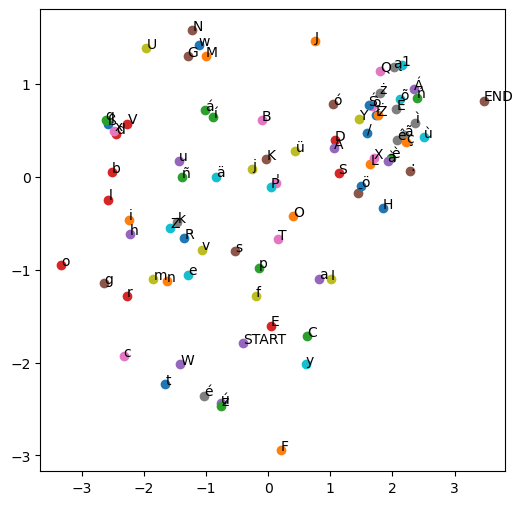

In [38]:
#plot the embeddings
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
for i in range(len(vocab)):
    plt.scatter(embeds_2d[i, 0], embeds_2d[i, 1])
    plt.annotate(idx_to_token[i], (embeds_2d[i, 0], embeds_2d[i, 1]))
plt.show()